In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


df= pd.read_csv('data/data_train.csv', delimiter='\t', quotechar='"')

absence_category
Faible     316
Modérée    105
Élevée      12
Name: count, dtype: int64


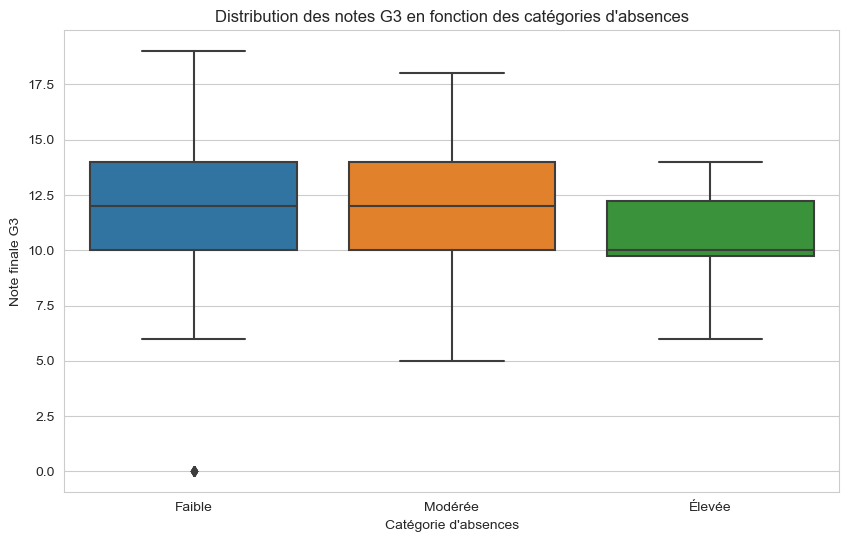

In [2]:
# Classification des absences en trois catégories
df['absence_category'] = pd.cut(df['absences'],
                                bins=[-1, 5, 15, df['absences'].max()],
                                labels=['Faible', 'Modérée', 'Élevée'])

# Vérification de la répartition des catégories
print(df['absence_category'].value_counts())

# Visualisation de la distribution des notes G3 en fonction des catégories d'absences
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='absence_category', y='G3')
plt.title('Distribution des notes G3 en fonction des catégories d\'absences')
plt.xlabel('Catégorie d\'absences')
plt.ylabel('Note finale G3')
plt.show()

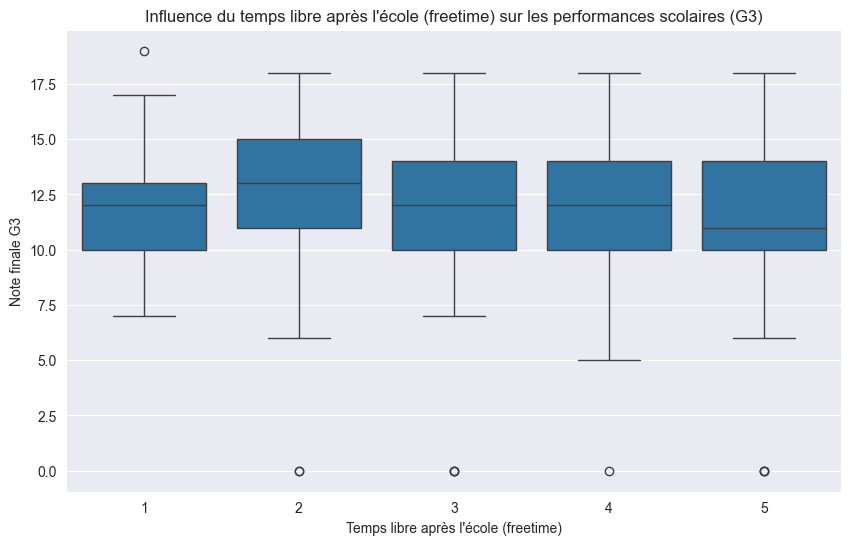

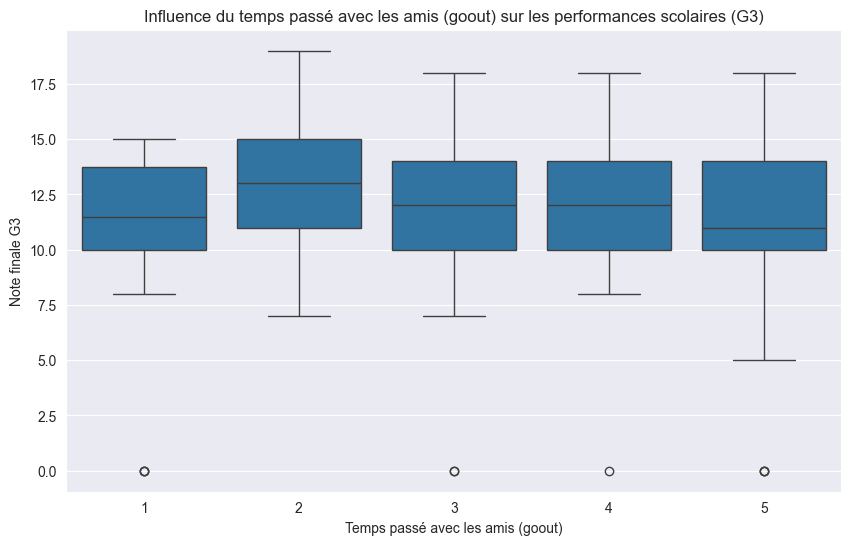

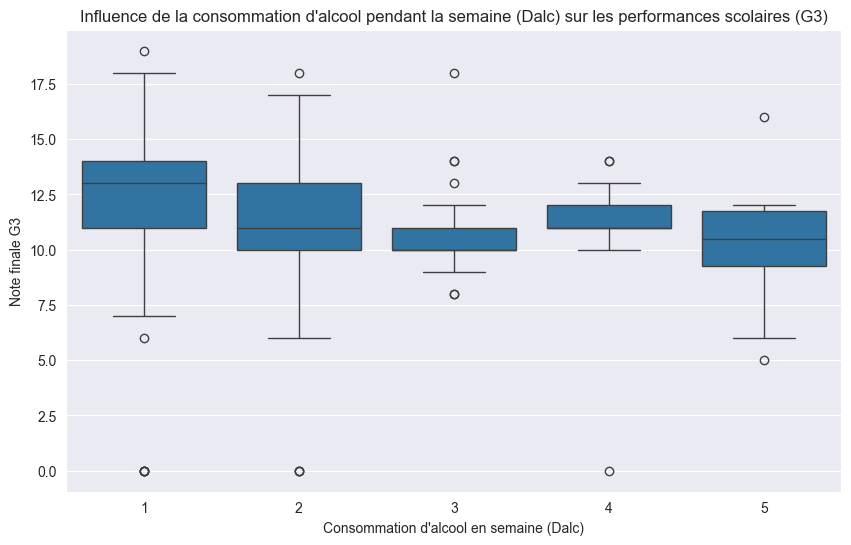

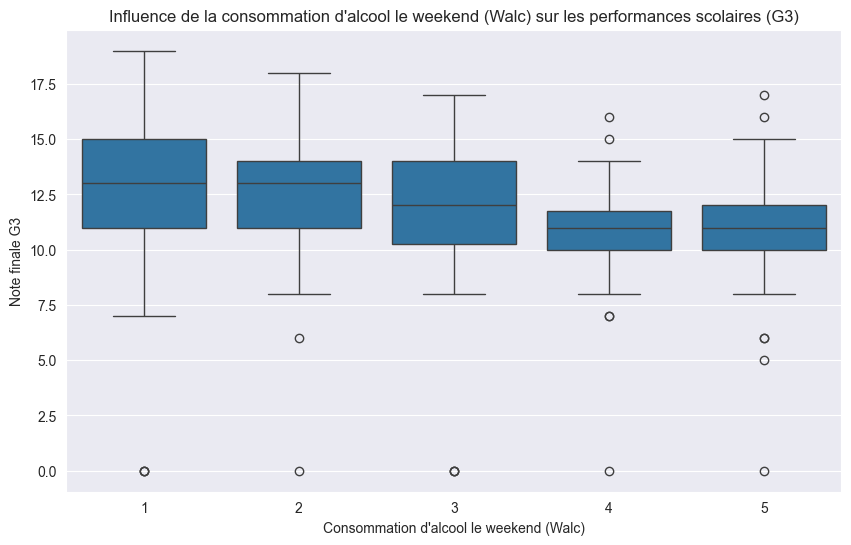

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du dataset
# Exemple : df = pd.read_csv('votre_fichier.csv')

# Analyse de l'influence de freetime et goout sur G3
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='freetime', y='G3')
plt.title('Influence du temps libre après l\'école (freetime) sur les performances scolaires (G3)')
plt.xlabel('Temps libre après l\'école (freetime)')
plt.ylabel('Note finale G3')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='goout', y='G3')
plt.title('Influence du temps passé avec les amis (goout) sur les performances scolaires (G3)')
plt.xlabel('Temps passé avec les amis (goout)')
plt.ylabel('Note finale G3')
plt.show()

# Analyse de l'influence de Dalc et Walc sur G3
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dalc', y='G3')
plt.title('Influence de la consommation d\'alcool pendant la semaine (Dalc) sur les performances scolaires (G3)')
plt.xlabel('Consommation d\'alcool en semaine (Dalc)')
plt.ylabel('Note finale G3')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Walc', y='G3')
plt.title('Influence de la consommation d\'alcool le weekend (Walc) sur les performances scolaires (G3)')
plt.xlabel('Consommation d\'alcool le weekend (Walc)')
plt.ylabel('Note finale G3')
plt.show()



C:\Users\dieze\anaconda3\envs\analyseMultivarie\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dieze\anaconda3\envs\analyseMultivarie\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dieze\anaconda3\envs\analyseMultivarie\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dieze\anaconda3\envs\analyseMultivarie\Lib\site-packages\s

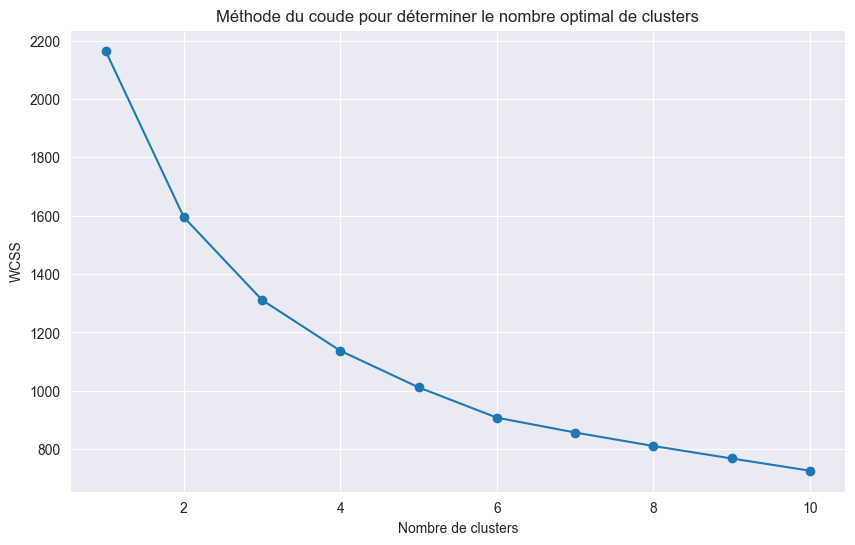

C:\Users\dieze\anaconda3\envs\analyseMultivarie\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


   Cluster         G3
0        0  13.400000
1        1  12.020548
2        2  12.205674
3        3  10.618421


C:\Users\dieze\AppData\Local\Temp\ipykernel_25456\2977909172.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='G3', data=cluster_means, palette='viridis')


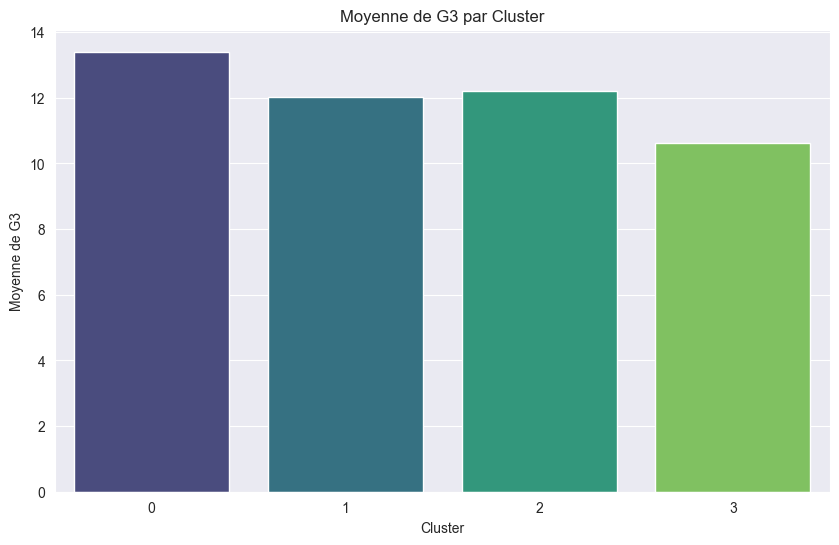

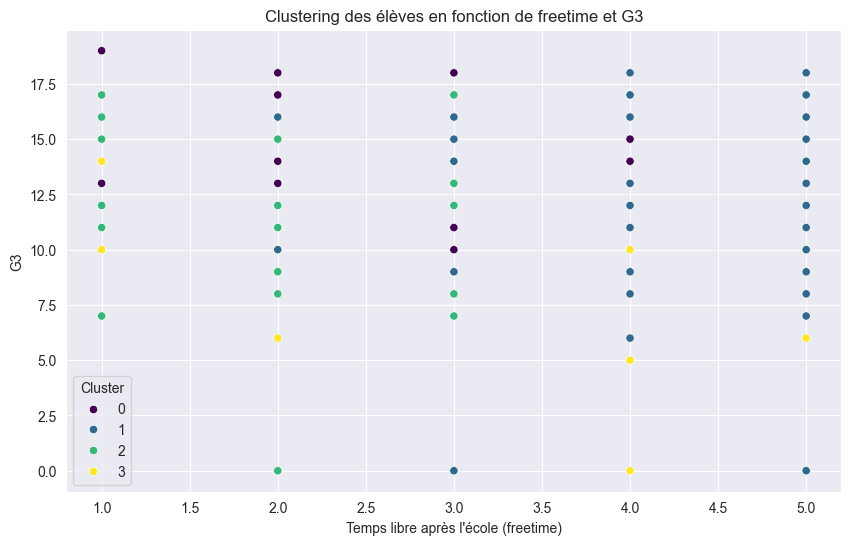

In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
features = ['freetime', 'goout', 'studytime', 'Dalc', 'Walc']

# Normalisation des données pour le clustering
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
# Déterminer le nombre optimal de clusters avec la méthode du coude
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualisation de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

# Choisir un nombre de clusters, par exemple 3
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
# Calcul des moyennes de G3 par cluster
cluster_means = df.groupby('Cluster')['G3'].mean().reset_index()
print(cluster_means)

# Visualisation des moyennes de G3 dans chaque cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='G3', data=cluster_means, palette='viridis')
plt.title('Moyenne de G3 par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Moyenne de G3')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='freetime', y='G3', hue='Cluster', palette='viridis')
plt.title('Clustering des élèves en fonction de freetime et G3')
plt.xlabel('Temps libre après l\'école (freetime)')
plt.ylabel('G3')
plt.show()


count    433.000000
mean      12.057737
std        3.149646
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


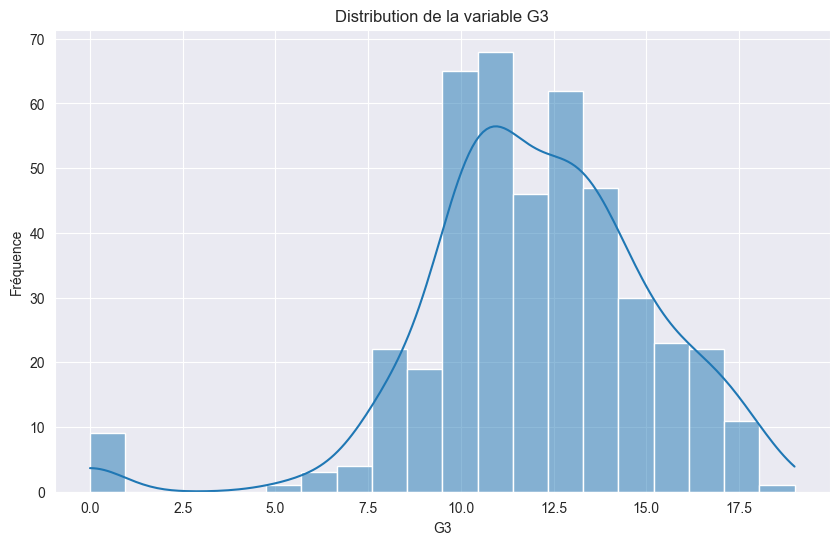

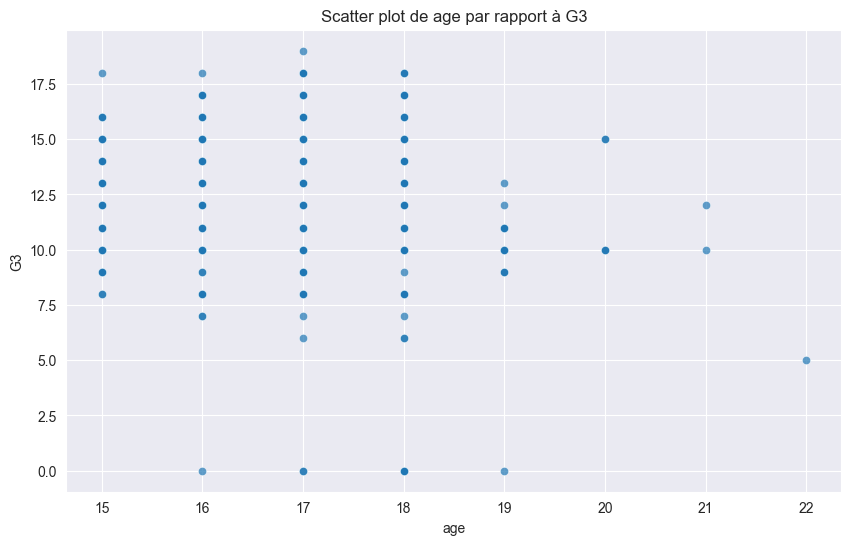

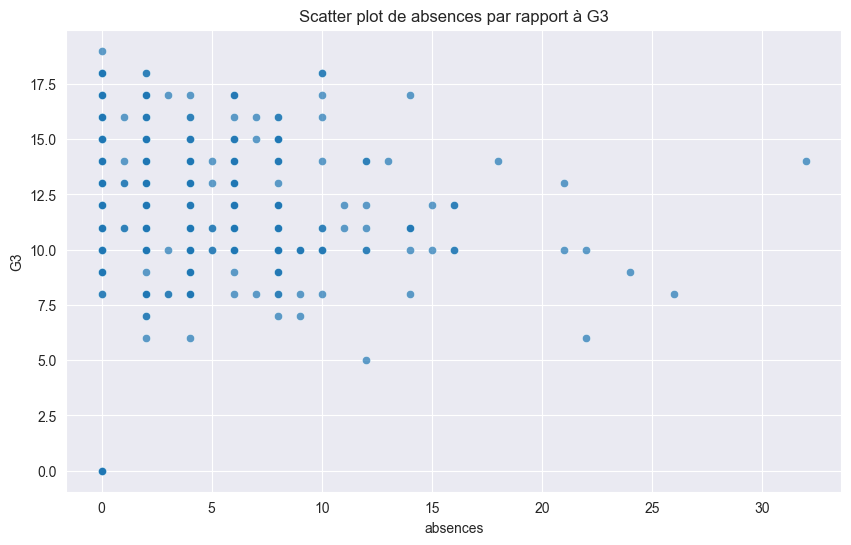

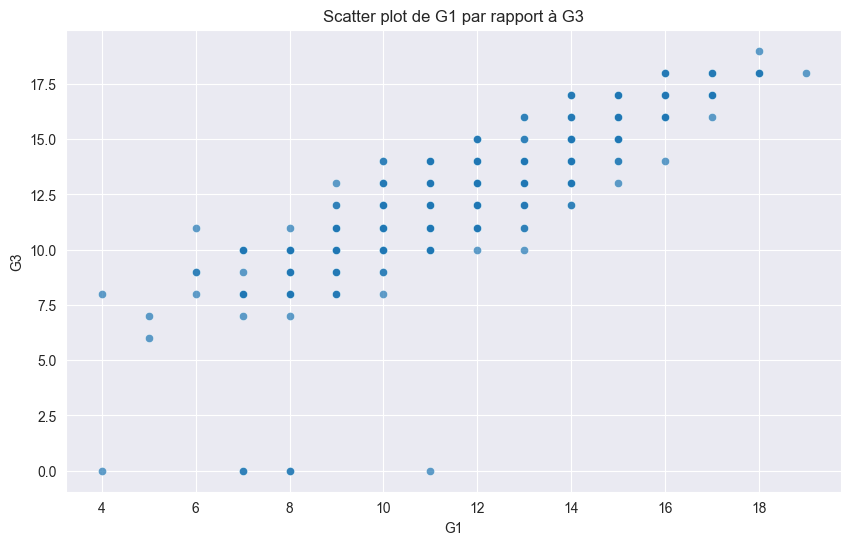

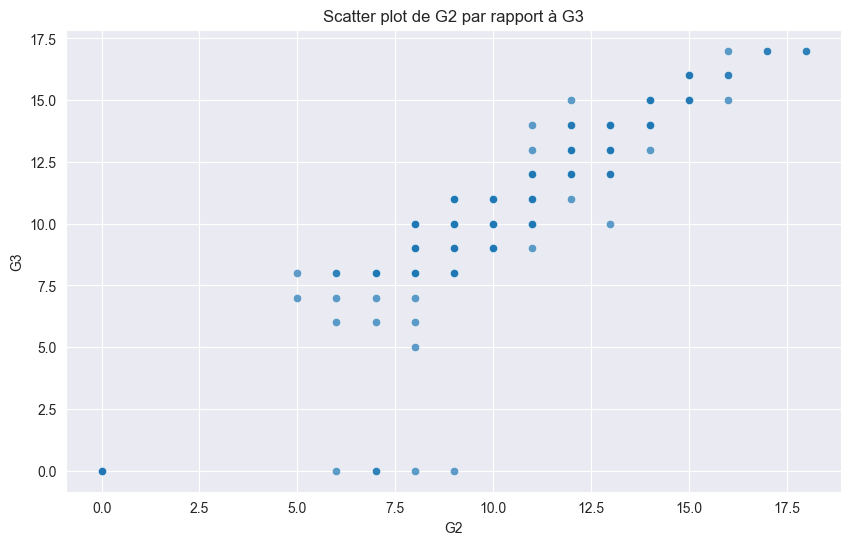

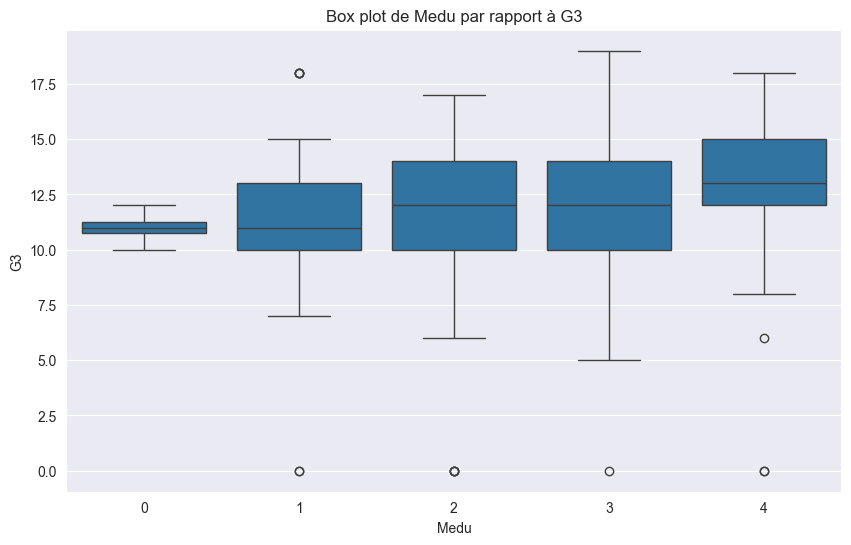

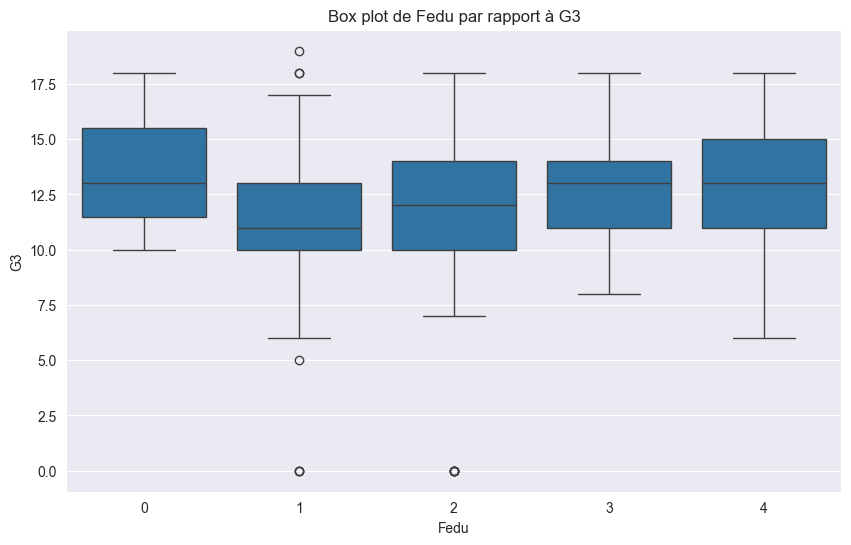

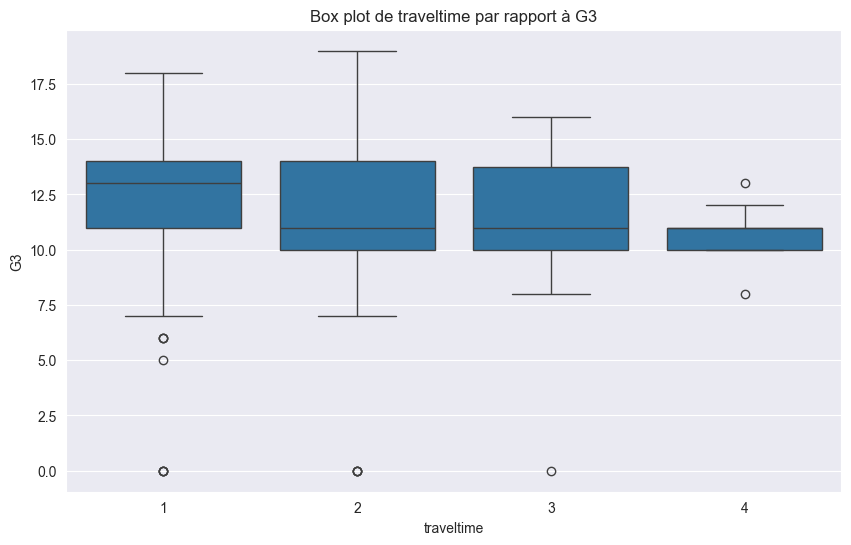

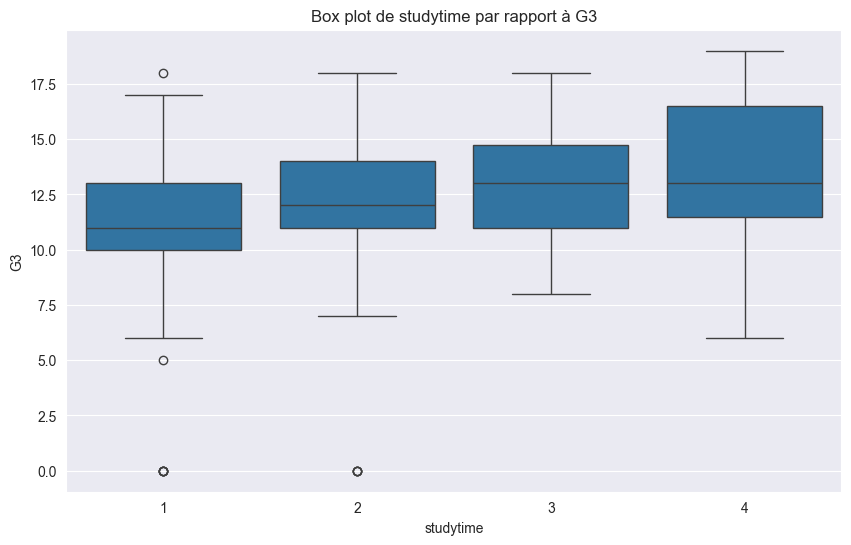

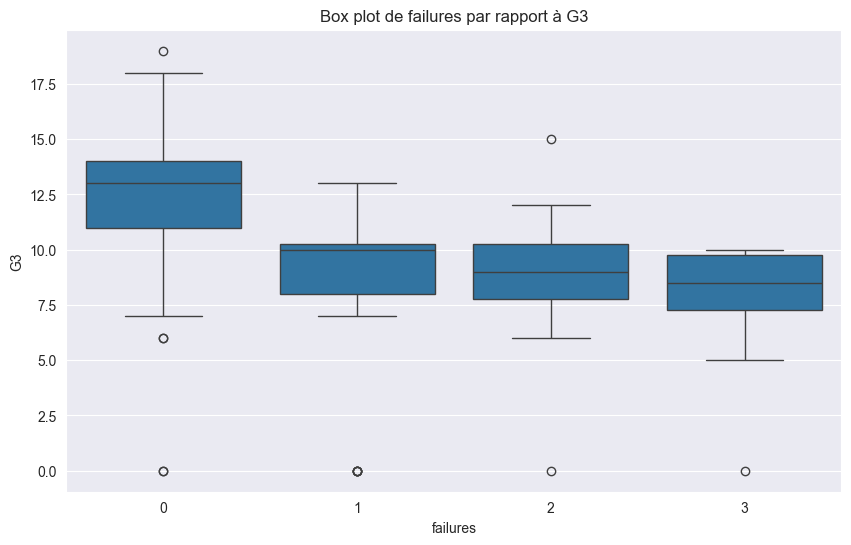

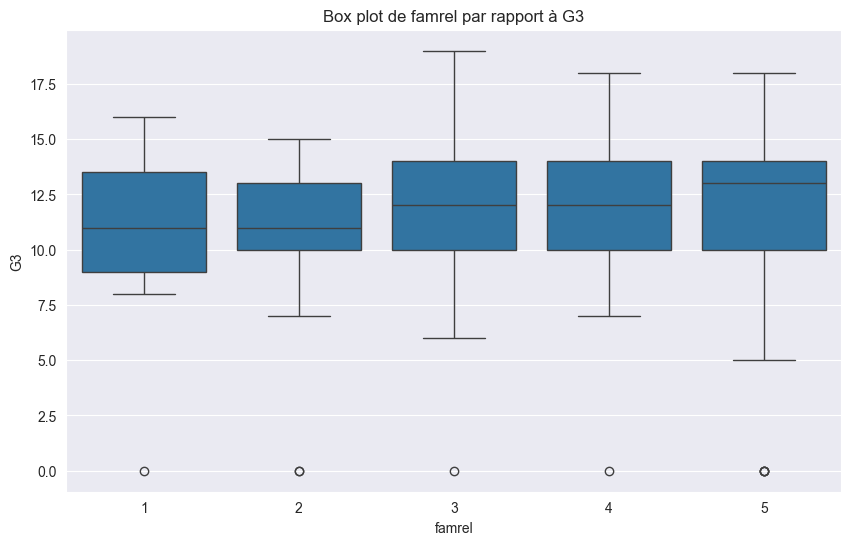

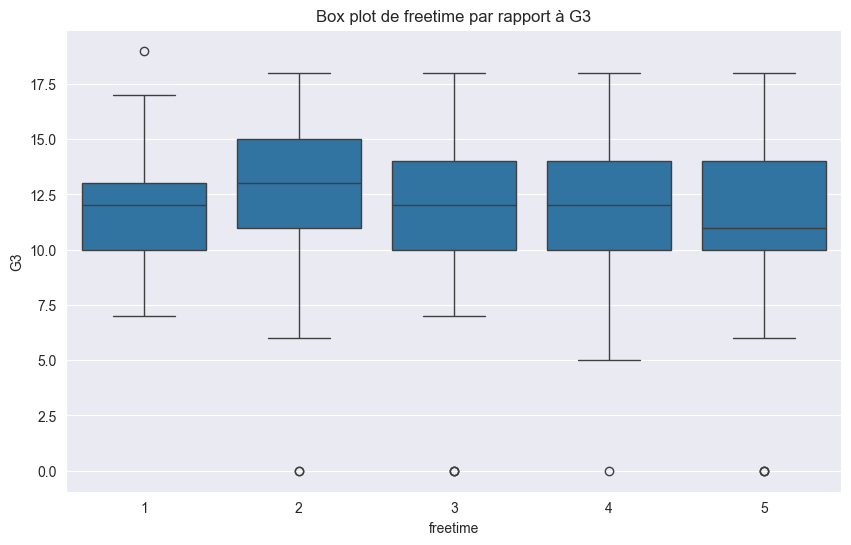

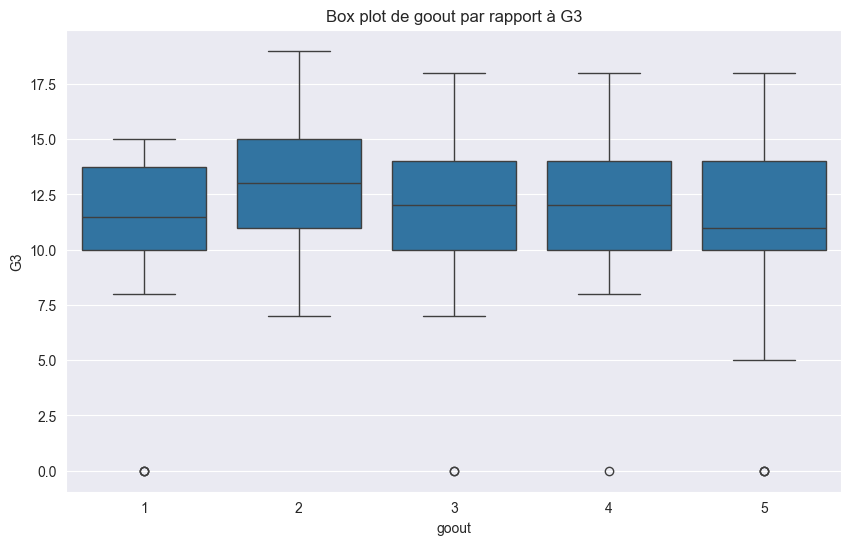

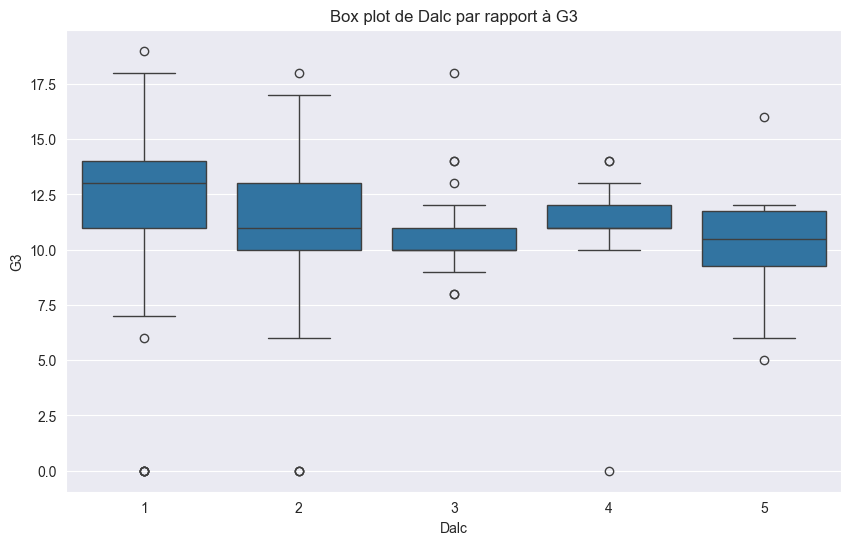

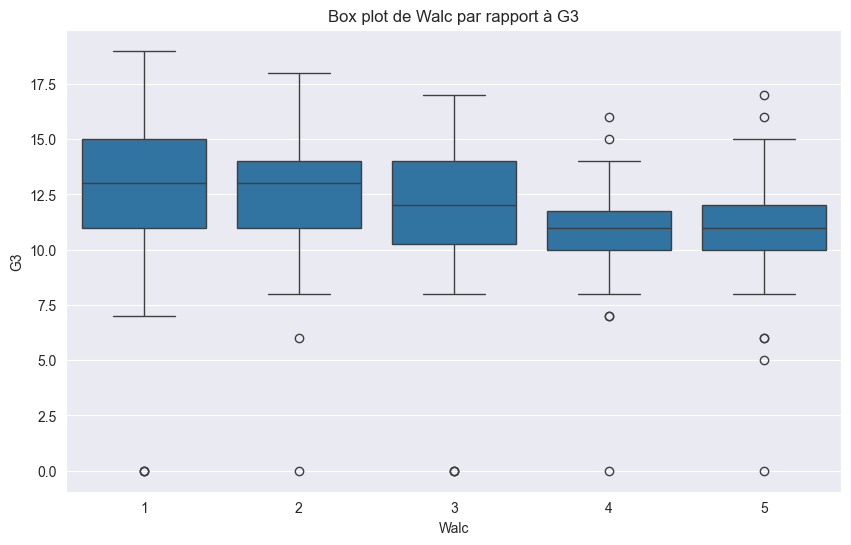

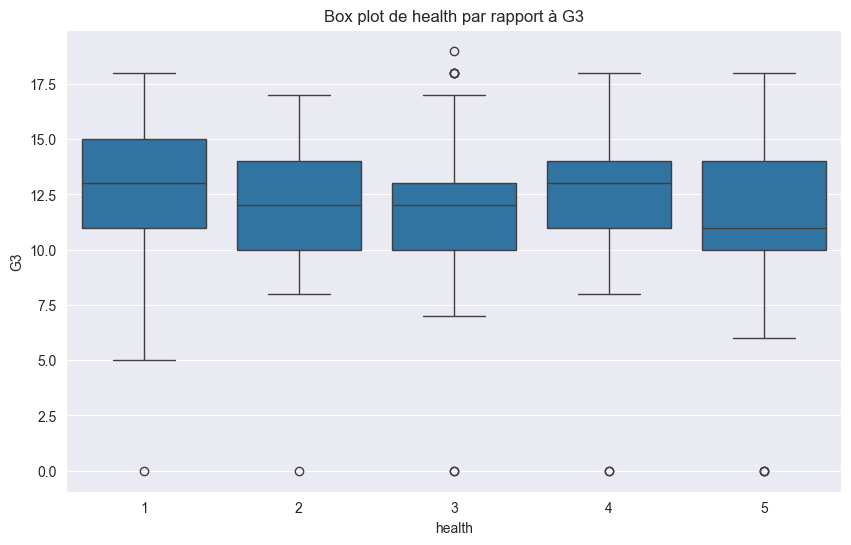

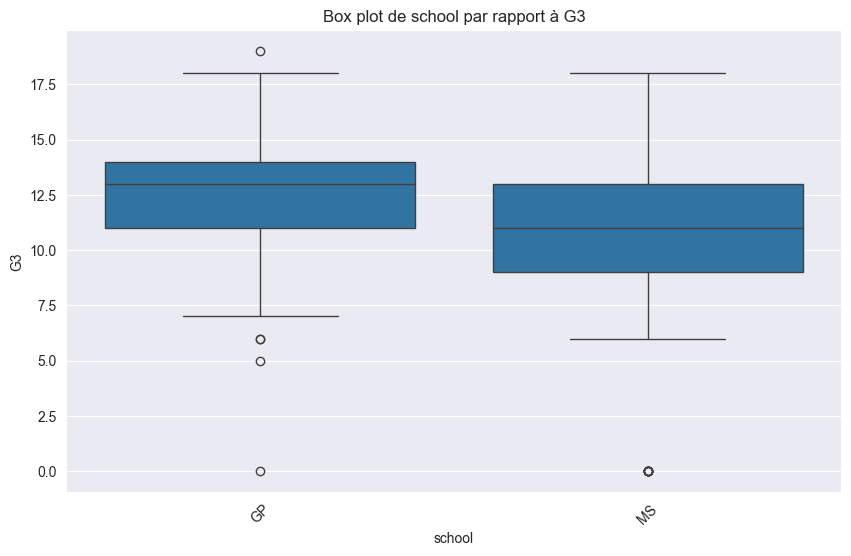

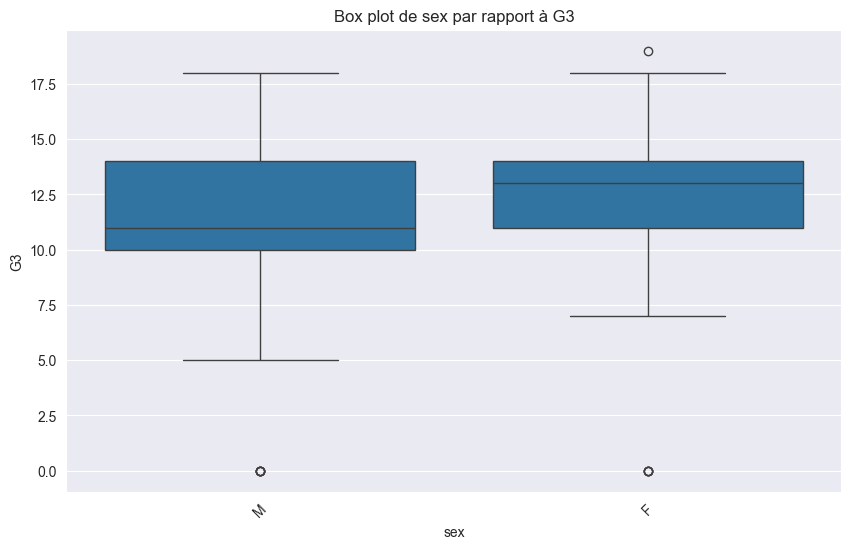

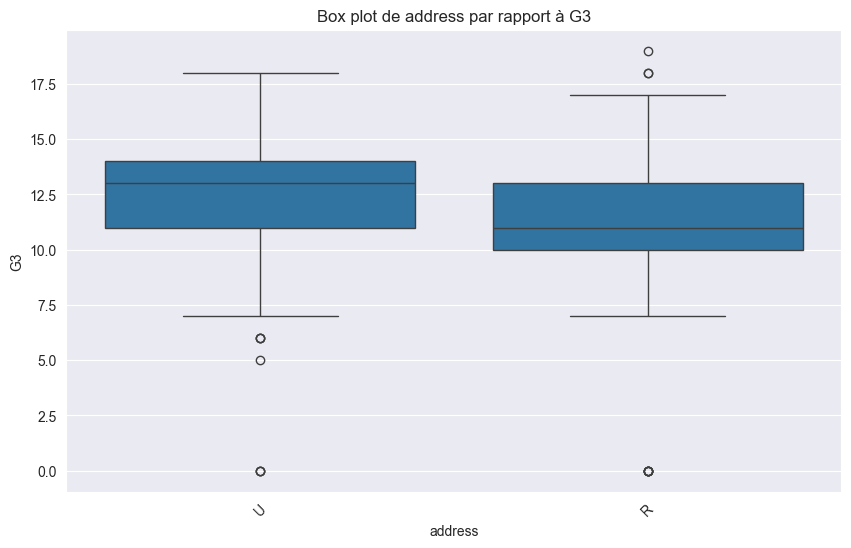

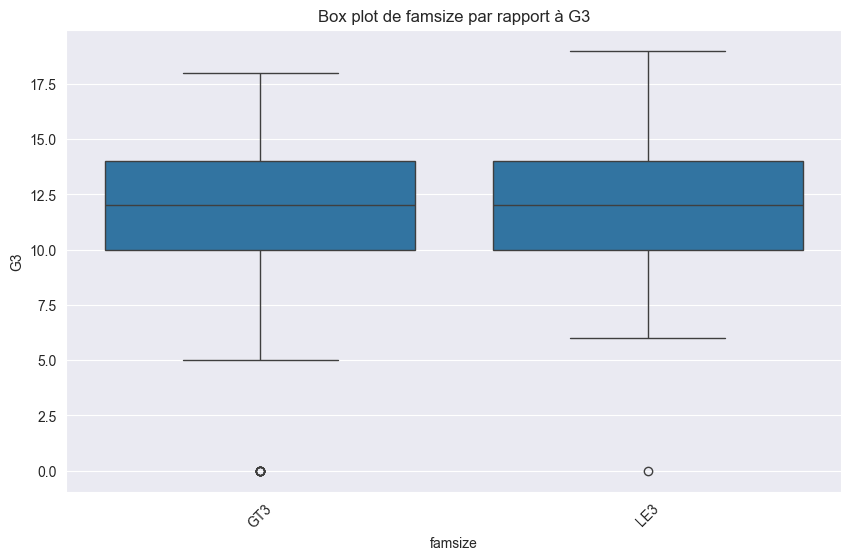

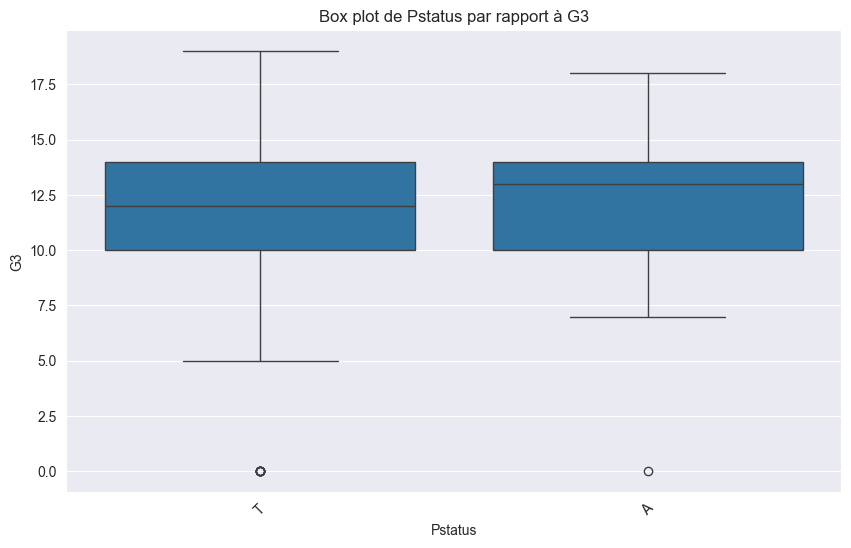

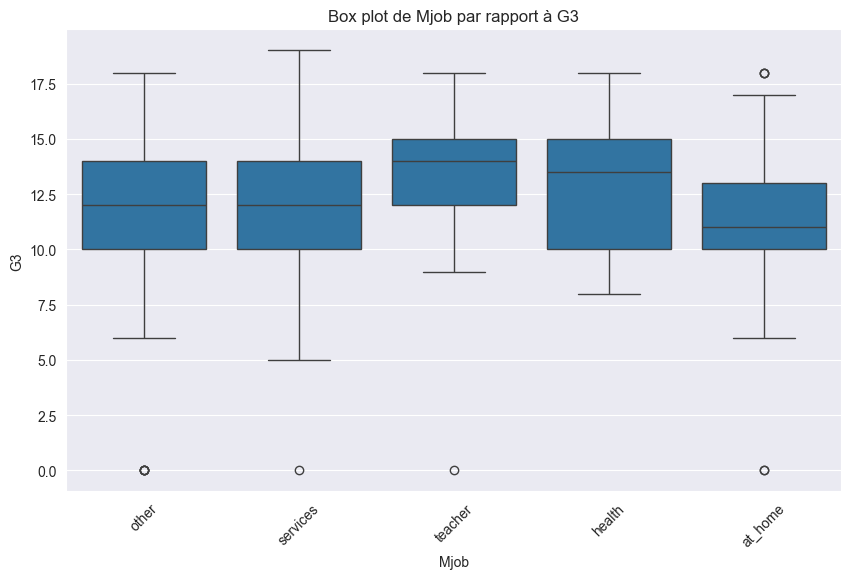

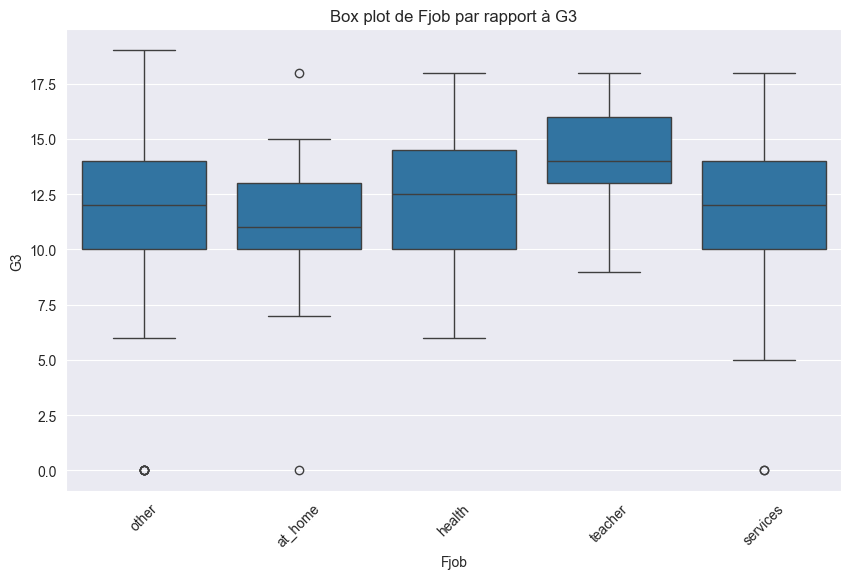

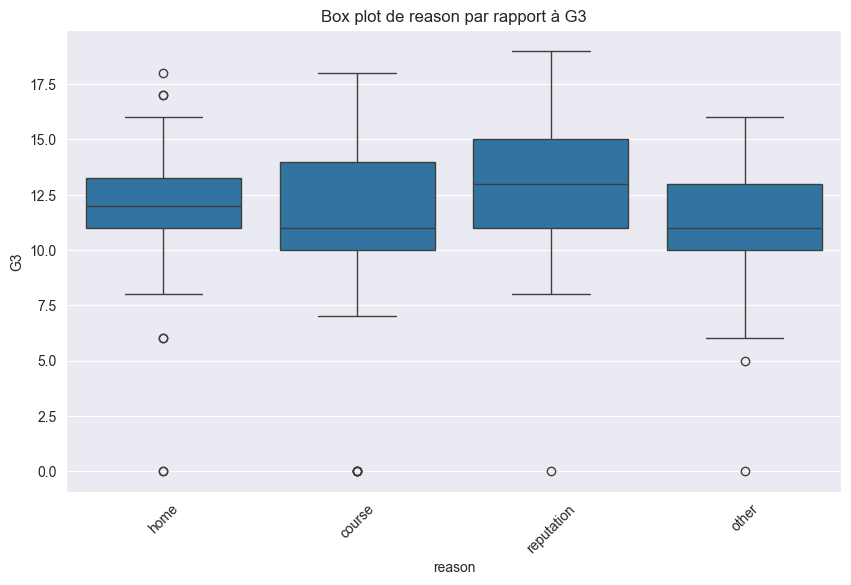

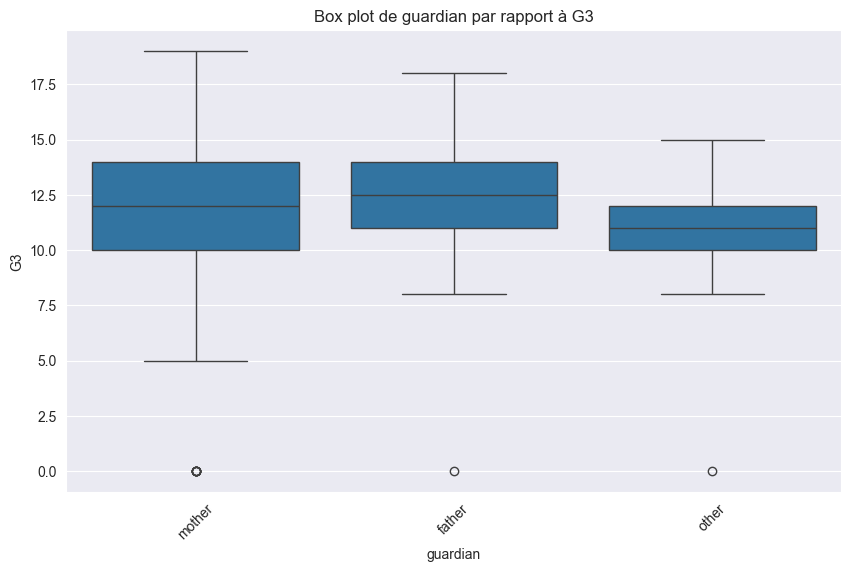

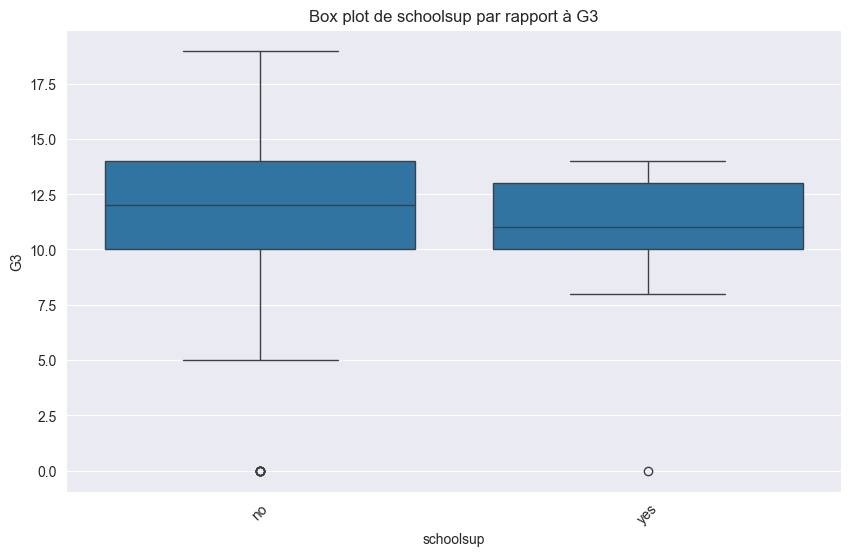

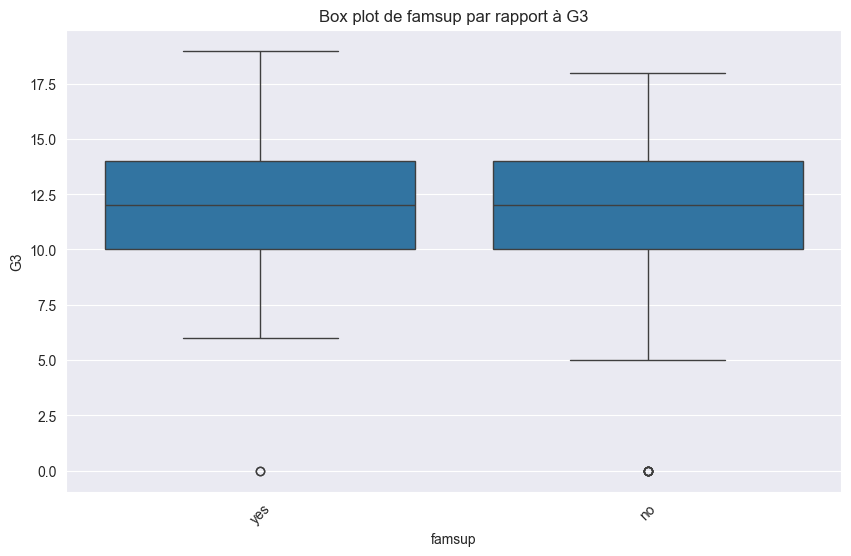

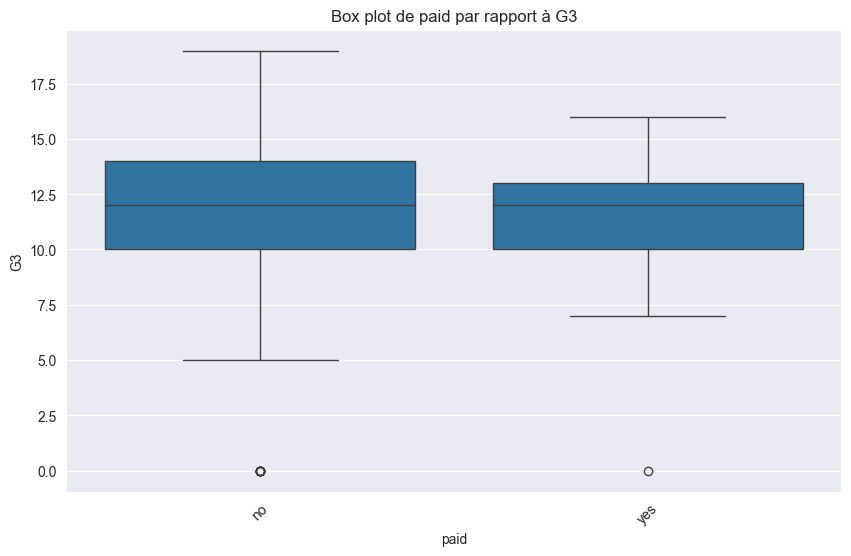

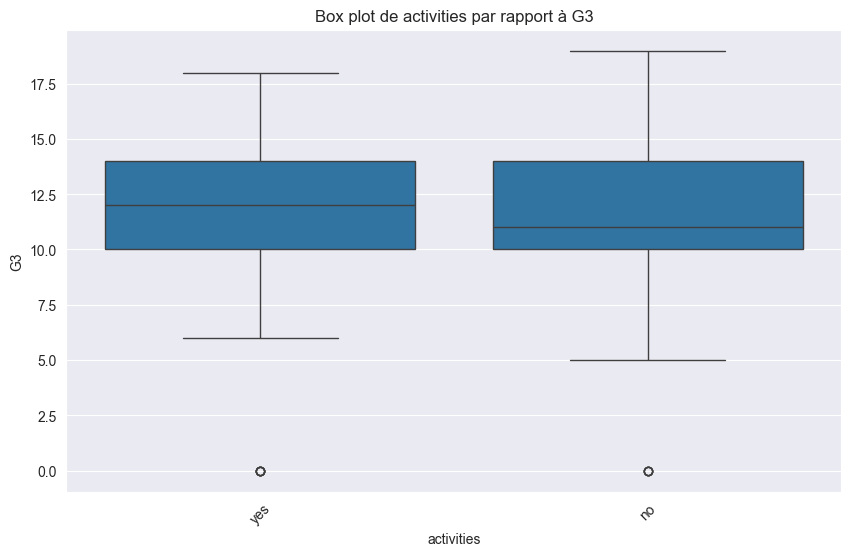

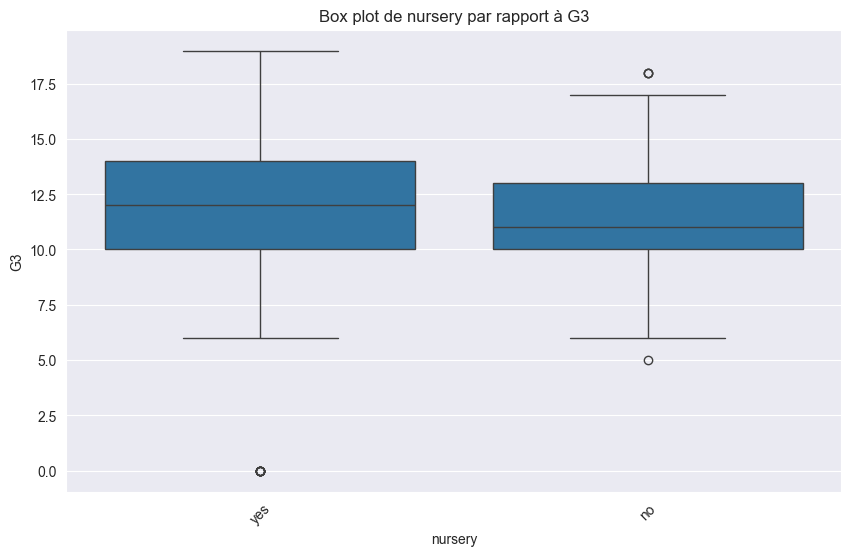

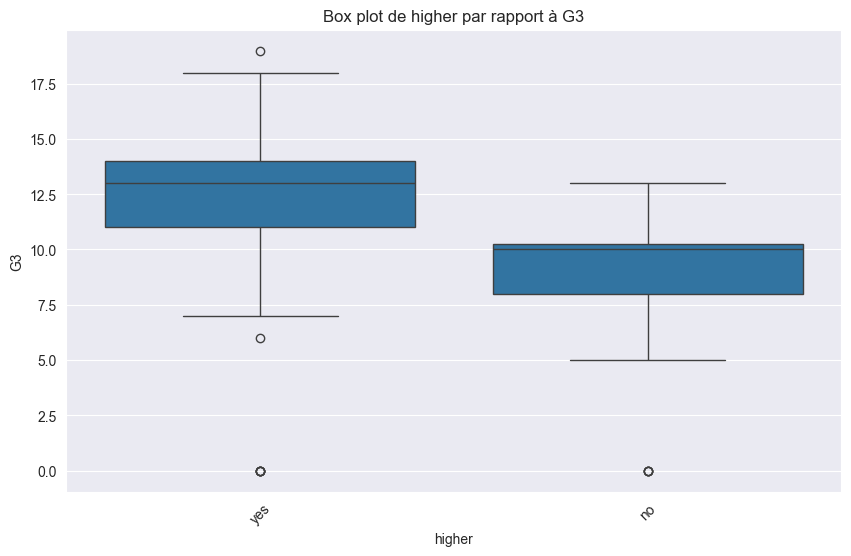

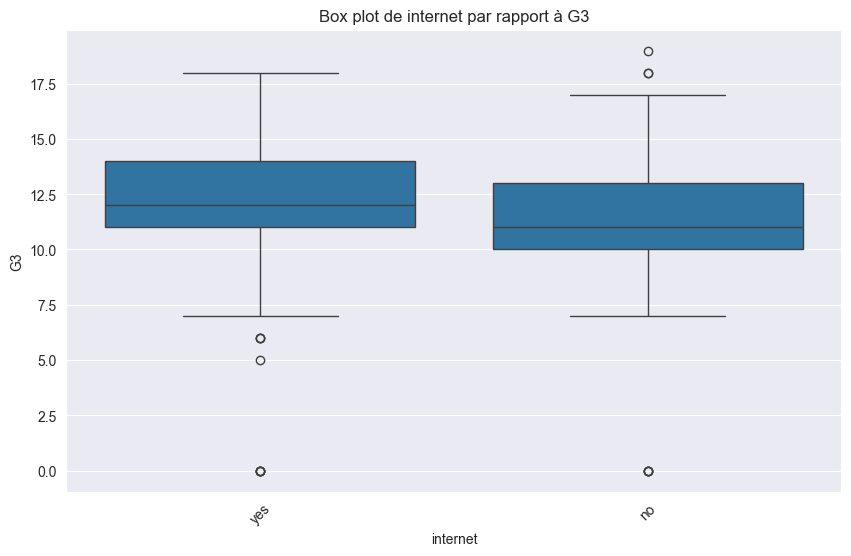

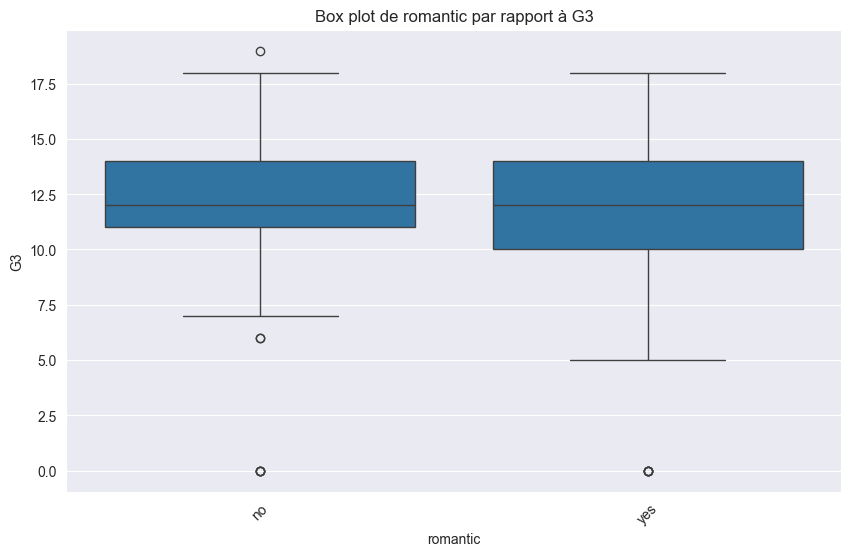

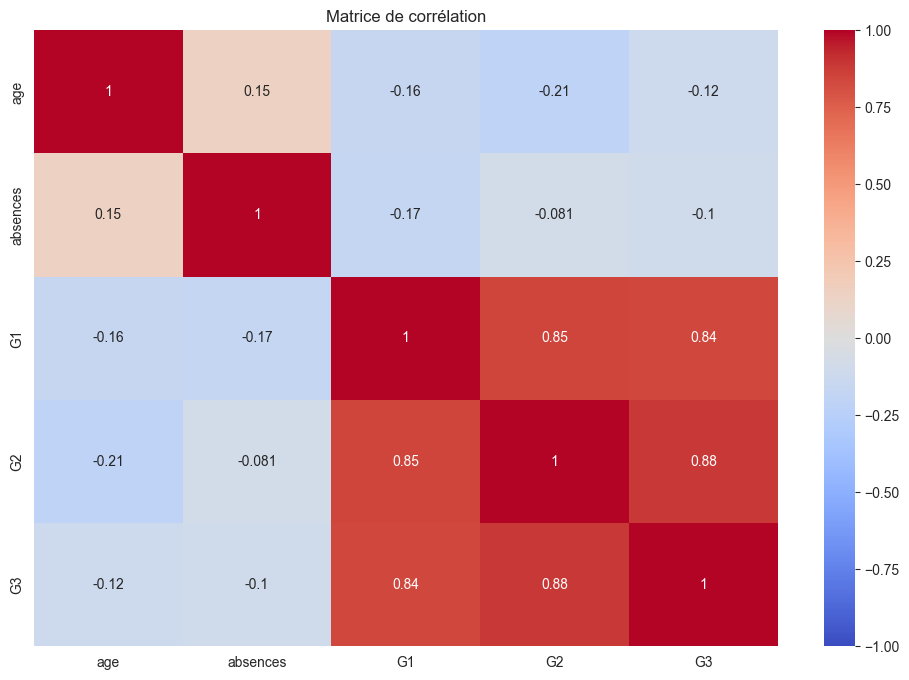

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset
# Exemple : df = pd.read_csv('votre_fichier.csv')

# Définir la variable cible
target_column = 'G3'

# Résumé statistique de la variable cible
print(df[target_column].describe())

# Visualisation de la distribution de la variable cible
plt.figure(figsize=(10, 6))
sns.histplot(df[target_column], kde=True, bins=20)
plt.title(f'Distribution de la variable {target_column}')
plt.xlabel(target_column)
plt.ylabel('Fréquence')
plt.show()

# Analyse des variables numériques continues par rapport à G3
continues_columns = ['age', 'absences', 'G1', 'G2']

for column in continues_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=column, y=target_column, alpha=0.7)
    plt.title(f'Scatter plot de {column} par rapport à {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

# Analyse des variables discrètes par rapport à G3
discrete_columns = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

for column in discrete_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column, y=target_column)
    plt.title(f'Box plot de {column} par rapport à {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

# Analyse des variables nominales par rapport à G3
nominal_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                   'Mjob', 'Fjob', 'reason', 'guardian',
                   'schoolsup', 'famsup', 'paid', 'activities',
                   'nursery', 'higher', 'internet', 'romantic']

for column in nominal_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column, y=target_column)
    plt.title(f'Box plot de {column} par rapport à {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.xticks(rotation=45)
    plt.show()

# Matrice de corrélation pour les variables continues
plt.figure(figsize=(12, 8))
corr = df[continues_columns + [target_column]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation')
plt.show()


absence_category
Faible     316
Modérée    105
Élevée      12
Name: count, dtype: int64


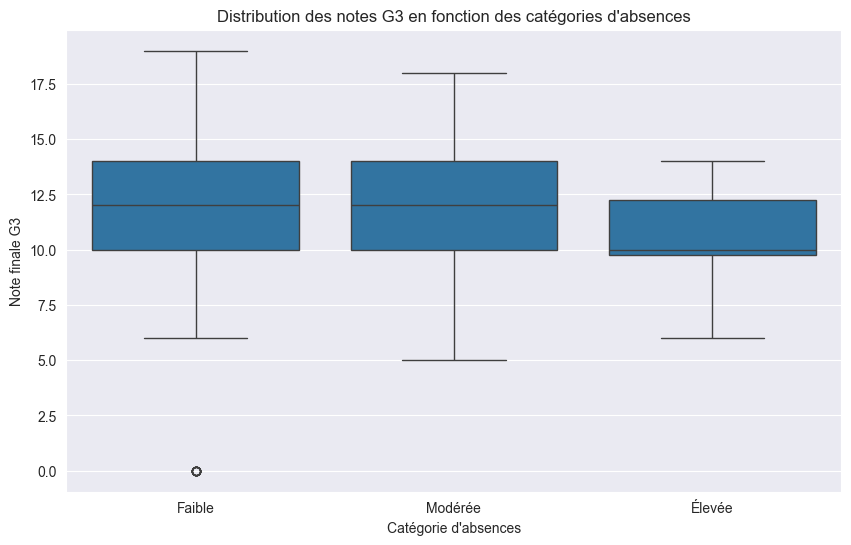